In [24]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
london = pd.read_csv("../Data/Londondata/london_formatted_narrow.csv")

In [3]:
london.drop("Unnamed: 0",axis = 1, inplace = True)

In [4]:
london["hour"] = london["hour"].astype(str).str.zfill(2)

In [5]:
london["day_of_the_week"] = london["day_of_the_week"].where(
    (london["day_of_the_week"] != 'Monday'), '0').where(
    (london["day_of_the_week"] != 'Tuesday'), '1').where(
    (london["day_of_the_week"] != 'Wednesday'), '2').where(
    (london["day_of_the_week"] != 'Thursday'), '3').where(
    (london["day_of_the_week"] != 'Friday'), '4').where(
    (london["day_of_the_week"] != 'Saturday'), '5').where(
    (london["day_of_the_week"] != 'Sunday'), '6')

In [6]:
london['timestamp'] = london["season"] + ' ' + london['day_of_the_week'] + ' ' + london['hour'] + 'h'

In [7]:
london.head()

profile_ID  season day_of_the_week hour  consumption_kWh     timestamp
0  MAC000036  Winter               4   00         0.027833  Winter 4 00h
1  MAC000036  Winter               4   01         0.032500  Winter 4 01h
2  MAC000036  Winter               4   02         0.030583  Winter 4 02h
3  MAC000036  Winter               4   03         0.023250  Winter 4 03h
4  MAC000036  Winter               4   04         0.033000  Winter 4 04h

Pivot it 

In [8]:
london_cluster = london.pivot(index='profile_ID', columns='timestamp', values='consumption_kWh')

In [9]:
london_cluster.drop(['MAC000037', 'MAC000197'], inplace = True)

In [10]:
london_cluster

timestamp   Autumn 0 00h  Autumn 0 01h  Autumn 0 02h  Autumn 0 03h  \
profile_ID                                                           
MAC000036       0.042077      0.040769      0.040462      0.037692   
MAC000038       0.248538      0.231538      0.211000      0.273462   
MAC000039       0.170308      0.152462      0.152846      0.155077   
MAC000040       0.998769      0.754538      1.082846      0.900846   
MAC000041       0.311615      0.176462      0.173692      0.176692   
MAC000042       0.164692      0.142462      0.139385      0.169077   
MAC000043       0.070462      0.081154      0.084846      0.062154   
MAC000045       0.265692      1.888308      0.243538      0.217231   
MAC000049       0.934769      0.660385      0.532462      0.382077   
MAC000053       0.197000      0.129385      0.097923      0.101385   
MAC000054       0.355000      0.264615      0.209462      0.202385   
MAC000055       0.306769      0.267615      0.291462      0.278769   
MAC000056       0.074769      0.077077      0.058923      0.056923   
MAC000057       0.256154      0.259923      0.249462      0.292769   
MAC000058       0.054846      0.062154      0.051615      0.064923   
MAC000059       0.579769      0.508615      0.474538      0.455308   
MAC000060       0.255923      0.156000      0.127077      0.125385   
MAC000061       0.127000      0.085923      0.097615      0.098692   
MAC000062       0.380692      0.390538      0.396154      0.400923   
MAC000066       0.230615      0.213231      0.198923      0.191538   
MAC000067       0.213000      0.179154      0.150154      0.126692   
MAC000069       0.051308      0.049615      0.048000      0.048923   
MAC000070       0.047308      0.050000      0.040769      0.056385   
MAC000072       0.046846      0.046692      0.049462      0.049385   
MAC000074       0.452000      0.243769      0.180077      0.199615   
MAC000077       0.204308      0.129538      0.116846      0.106923   
MAC000078       0.092231      0.056846      0.072308      0.060769   
MAC000081       0.218769      0.204692      0.206462      0.207308   
MAC000083       0.288615      0.302462      0.289077      0.273462   
MAC000084       0.408923      0.413846      0.417154      0.414923   
...                  ...           ...           ...           ...   
MAC000630       0.183538      0.179692      0.180231      0.176000   
MAC000631       0.101231      0.069308      0.059385      0.086077   
MAC000632       0.234923      0.155615      0.156462      0.150846   
MAC000634       0.059000      0.060615      0.081846      0.072462   
MAC000637       0.066385      0.078000      0.054000      0.071923   
MAC000638       0.182385      0.184923      0.171769      0.203846   
MAC000639       0.083846      0.072846      0.089462      0.075615   
MAC000642       0.361923      0.541615      0.660000      0.545538   
MAC000643       0.285308      0.237308      0.220308      0.218077   
MAC000644       0.285000      0.259769      0.233538      0.258462   
MAC000645       0.056692      0.055692      0.053538      0.057308   
MAC000646       0.198923      0.204077      0.191462      0.196769   
MAC000647       0.300308      0.246231      0.203538      0.167462   
MAC000648       0.156462      0.154231      0.154769      0.161000   
MAC000649       0.172538      0.113769      0.118308      0.122077   
MAC000650       0.462769      0.349000      0.298692      0.316231   
MAC000652       0.004154      0.001231      0.000000      0.000308   
MAC000654       0.958231      0.947462      0.995077      0.948154   
MAC000656       0.235692      0.225462      0.204923      0.213692   
MAC000657       0.119000      0.098462      0.092385      0.089000   
MAC000658       0.130846      0.111154      0.095769      0.093692   
MAC000659       0.089154      0.071385      0.076692      0.083538   
MAC000660       0.090385      0.086615      0.082000      0.083923   
MAC000661       0.500154      0.492538      0.374385      0.339308   
MAC000662 

### First clustering test

In [123]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(london_cluster)

In [124]:
centroids = kmeans.cluster_centers_ 

In [125]:
centroids


array([[0.16604741, 0.13532779, 0.1259033 , ..., 0.43558242, 0.37932507,
        0.29503611],
       [0.97104049, 0.81044939, 0.83061943, ..., 2.2461417 , 2.10912348,
        1.82723887],
       [0.41272527, 0.33647715, 0.28229049, ..., 1.02400453, 0.9099119 ,
        0.75128861],
       [3.20444872, 2.7780641 , 1.48703846, ..., 1.2834359 , 1.26947436,
        1.07976923]])

In [126]:
labels = list(kmeans.labels_)


In [127]:
labels.count(0)

245

In [128]:
labels.count(1)

19

In [129]:
labels.count(2)

133

In [130]:
labels.count(3)

6

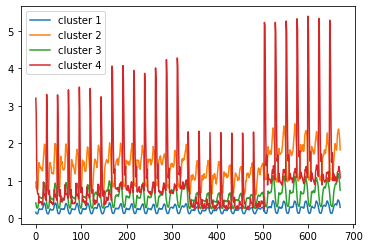

In [131]:
plt.plot(centroids[0], label = "cluster 1") 
plt.plot(centroids[1], label = "cluster 2") 
plt.plot(centroids[2], label = "cluster 3")
plt.plot(centroids[3], label = "cluster 4")


plt.legend() 
plt.show()


### Select the value of k

Elbow method with the WCSS

C:\Users\Kirsch\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


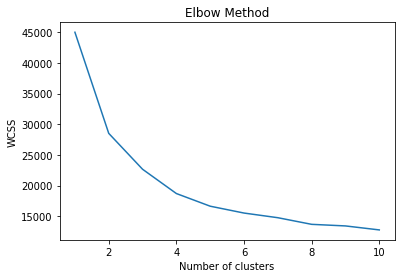

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(london_cluster)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Daves-Bouldin index

In [30]:
db = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(london_cluster)
    clusters = kmeans.labels_
    db.append(davies_bouldin_score(london_cluster, clusters))
plt.plot(range(2, 11), db)
plt.title('Daves Bouldin Index')
plt.xlabel('Number of clusters')
plt.ylabel('DB Index')
plt.show()

4 Clusters seems to be right

### Matching with ACORN Profiles 

In [97]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(london_cluster)

In [98]:
labels = list(kmeans.labels_)


In [99]:
ids = london_cluster.index
len(ids)

403

In [110]:
df = pd.DataFrame()
df["Profile ID"] = ids
df.index = df["Profile ID"] 
df.drop("Profile ID", axis = 1, inplace = True )
df["Cluster"] = labels
df.head()

Cluster
Profile ID         
MAC000036         0
MAC000038         2
MAC000039         0
MAC000040         1
MAC000041         0

In [101]:
acorn = pd.read_csv("../Data/Londondata/revised_new.csv")

In [113]:
acorn.drop_duplicates(subset ="LCLid", 
                     inplace = True)
acorn = acorn[["LCLid", "Acorn"]]
acorn.index = acorn["LCLid"]
acorn.drop("LCLid", axis = 1, inplace = True )
acorn.head()


Acorn
LCLid             
MAC000036  ACORN-E
MAC000037  ACORN-E
MAC000038  ACORN-L
MAC000039  ACORN-F
MAC000040  ACORN-A

In [114]:
acorn1 = pd.merge(df, acorn, left_index=True, right_index=True)

In [117]:
cluster_0 = acorn1[acorn1["Cluster"] == 0]
cluster_1 = acorn1[acorn1["Cluster"] == 1]
cluster_2 = acorn1[acorn1["Cluster"] == 2]
cluster_3 = acorn1[acorn1["Cluster"] == 3]

In [118]:
cluster_0.Acorn.unique()

array(['ACORN-E', 'ACORN-F', 'ACORN-Q', 'ACORN-H', 'ACORN-N', 'ACORN-G',
       'ACORN-U', 'ACORN-J', 'ACORN-M', 'ACORN-L', 'ACORN-K', 'ACORN-C',
       'ACORN-O', 'ACORN-P', 'ACORN-D', 'ACORN-I'], dtype=object)

In [119]:
cluster_0.groupby('Acorn').count()

Cluster
Acorn           
ACORN-C        3
ACORN-D        8
ACORN-E       75
ACORN-F       43
ACORN-G        6
ACORN-H       15
ACORN-I        1
ACORN-J        2
ACORN-K       11
ACORN-L       14
ACORN-M        4
ACORN-N        3
ACORN-O        5
ACORN-P        6
ACORN-Q       48
ACORN-U        1

In [120]:
cluster_1.groupby('Acorn').count()

Cluster
Acorn           
ACORN-A        4
ACORN-C        1
ACORN-D        2
ACORN-E        7
ACORN-H        1
ACORN-L        2
ACORN-Q        2

In [121]:
cluster_2.groupby('Acorn').count()

Cluster
Acorn           
ACORN-A        4
ACORN-C        2
ACORN-D        9
ACORN-E       39
ACORN-F       19
ACORN-G        6
ACORN-H       16
ACORN-J        1
ACORN-K        9
ACORN-L       11
ACORN-N        1
ACORN-O        2
ACORN-P        2
ACORN-Q       12

In [122]:
cluster_3.groupby('Acorn').count()

Cluster
Acorn           
ACORN-E        5
ACORN-F        1